<h1>Midterm Project - Finding Trends in the Voter Support for Different Candidates in the 2016 US Presidential Primaries</h1>

<h4>Benjamin Hoover - November 15, 2016</h4>

This lab uses primary data from FiveThirtyEight and the US Census to answer the following questions about the 2016 Presidential Primaries:
1. Counties with greater Democrat support for a particular candidate were more likely to have more Republicans supporting which candidate?
2. Which demographics - income, unemployment rate, % white proportion, and population density - are associated with a greater likelihood of the county voting for a particular candidate?

In [3]:
import statistics
import matplotlib.pyplot as plt
import scipy.stats as sp
import pandas
% matplotlib inline

<h2>Part 1: Counties with greater Bernie Sanders/Hillary Clinton support correlate to which Republican candidate's support?</h2>

This part of the analysis uses primary data from FiveThirtyEight to determine which Republican candidate was the county was most likely to vote for given the results of the Democrat primary.

R Value: -0.0279980266663
R Squared: 0.000783889497207
y = -0.0228340984315x + 47.8303479251


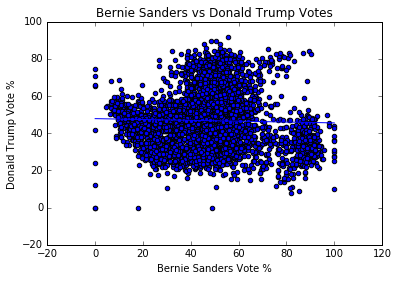

In [4]:
#read files
file = open("primary_results.csv", "r", errors="ignore")
stuff = []
#put stuff in cities
for county in file:
    stuff.append(county)
del stuff[0]


#get 
counties = {}

#get support per canidate
for county in stuff:
    countyName = county.split(",")[2] + " County, " + county.split(",")[0]
    if countyName not in counties:
        counties[countyName] = {}
    countyDict = counties[countyName]
    canidate = county.split(",")[5]
    percent = county.split(",")[7].replace("\n","")
    countyDict[canidate] = float(percent)*100
countyNames = counties.keys()
bernie = []
hillary = []
trump = []
ted = []
kasich = []

for countyName in counties.items():
    county = countyName[1]
    
    if "Bernie Sanders" in county and "Hillary Clinton" in county and "Donald Trump" in county and "Ted Cruz" in county and "John Kasich" in county:
        bernie.append(county["Bernie Sanders"])
        hillary.append(county["Hillary Clinton"])
        trump.append(county["Donald Trump"])
        ted.append(county["Ted Cruz"])
        kasich.append(county["John Kasich"])   
slope, intercept, rvalue, pvalue, stderr = sp.linregress(bernie, trump)
plt.scatter(bernie, trump)
plt.plot([0, max(bernie)],[intercept, max(bernie) * slope + intercept])
plt.xlabel("Bernie Sanders Vote %")
plt.ylabel("Donald Trump Vote %")
plt.title("Bernie Sanders vs Donald Trump Votes")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))




R Value: -0.255226818395
R Squared: 0.0651407288282
y = -0.186366541269x + 33.1499549797


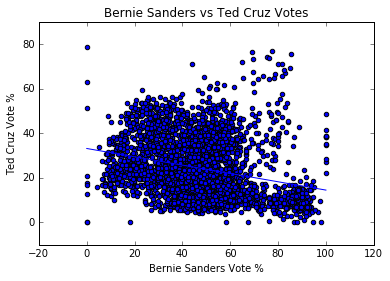

In [5]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(bernie, ted)
plt.scatter(bernie, ted)
plt.plot([0, max(bernie)],[intercept, max(bernie) * slope + intercept])
plt.xlabel("Bernie Sanders Vote %")
plt.ylabel("Ted Cruz Vote %")
plt.title("Bernie Sanders vs Ted Cruz Votes")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))




R Value: 0.445302287269
R Squared: 0.198294127047
y = 0.25579050451x + 0.0650710420841


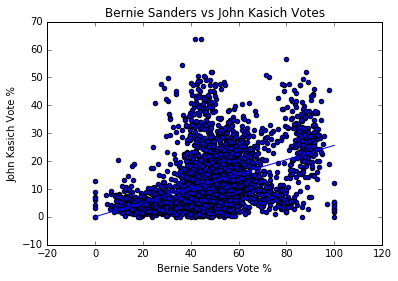

In [6]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(bernie, kasich)
plt.scatter(bernie, kasich)
plt.plot([0, max(bernie)],[intercept, max(bernie) * slope + intercept])
plt.xlabel("Bernie Sanders Vote %")
plt.ylabel("John Kasich Vote %")
plt.title("Bernie Sanders vs John Kasich Votes")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))





R Value: 0.0371664965498
R Squared: 0.00138134846579
y = 0.0308861585357x + 45.2168529583


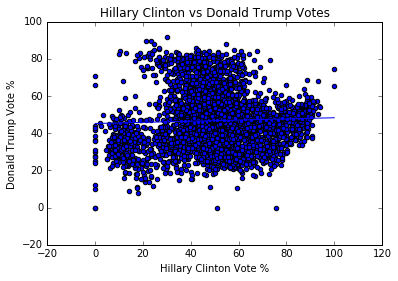

In [7]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(hillary, trump)
plt.scatter(hillary, trump)
plt.plot([0, max(hillary)],[intercept, max(hillary) * slope + intercept])
plt.xlabel("Hillary Clinton Vote %")
plt.ylabel("Donald Trump Vote %")
plt.title("Hillary Clinton vs Donald Trump Votes")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

R Value: 0.20327630201
R Squared: 0.041321254959
y = 0.151246110696x + 16.7788636735


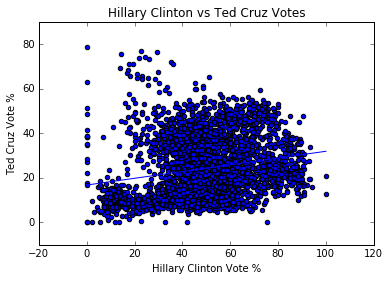

In [8]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(hillary, ted)
plt.scatter(hillary, ted)
plt.plot([0, max(hillary)],[intercept, max(hillary) * slope + intercept])
plt.xlabel("Hillary Clinton Vote %")
plt.ylabel("Ted Cruz Vote %")
plt.title("Hillary Clinton vs Ted Cruz Votes")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

R Value: -0.385787236696
R Squared: 0.148831791997
y = -0.22580480204x + 23.4306101932


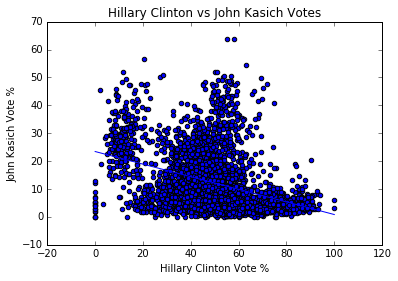

In [9]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(hillary, kasich)
plt.scatter(hillary, kasich)
plt.plot([0, max(hillary)],[intercept, max(hillary) * slope + intercept])
plt.xlabel("Hillary Clinton Vote %")
plt.ylabel("John Kasich Vote %")
plt.title("Hillary Clinton vs John Kasich Votes")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

There are clear correlations between Bernie votes and Kasich votes, suggesting that they appeal to similar demographics. There is also a fairly good correlation between Hillary and Ted votes. However, there was very little significant correlation between Bernie/Hillary votes and Trump votes, which, in other words, could be interpreted as: "the demographics that tend to like Donald Trump are not more likely to like a particular Democrat over the other."

To investigate the possible reasons behind these correlations, part 2 will analyze whether certain demographics are correlated with a greater vote share for each candidate.

<h2>Part 2: What demographics are associated with a greater vote share for a particular candidate - household income, unemployment rate, the percentage of white people, or population density?</h2>

This section of the analysis looks for correlations between different demographics and support for a given candidate, to determine which candidate a given county is most likely to vote for and to attempt to explain the correlations found in part 1. It uses 2015 US Census estimates of income, unemployment rate, and % white, and 2010 US Census survey results of population density.

In [10]:
#read files
filenew = open("income data.csv", "r", errors="ignore")
temp = []
#put stuff in cities
for item in filenew:
    temp.append(item)
del temp[0]
del temp[0]
#get each county, and add on the data to existing counties dictionary
for row in temp:
    nameWanted = row.split(",")[2][1:] + "," + row.split(",")[3][:-1]
    #print(row.split(",")[248])
    #print(row.split(",")[38])
    if nameWanted in counties.keys():
        diction = counties[nameWanted]
        diction["Median Income"] = int(row.split(",")[248])
        diction["Percent Unemployed"] = float(row.split(",")[38])
        
income = []
bernie = []
hillary = []
trump = []
ted = []
kasich = []
unemployment = []

#make income 

for countyName in counties.items():
    county = countyName[1]

    if "Bernie Sanders" in county and "Hillary Clinton" in county and "Donald Trump" in county and "Ted Cruz" in county and "John Kasich" in county and "Median Income" in county and "Percent Unemployed" in county:
        unemployment.append(county["Percent Unemployed"])
        income.append(county["Median Income"])
        bernie.append(county["Bernie Sanders"])
        hillary.append(county["Hillary Clinton"])
        trump.append(county["Donald Trump"])
        ted.append(county["Ted Cruz"])
        kasich.append(county["John Kasich"])   

<b>Section A: Are Counties with a Higher Median Income More Likely to Vote for a Certain Candidate?</b>

R Value: 0.255700745442
R Squared: 0.0653828712195
y = 0.000338127862054x + 27.9395522096


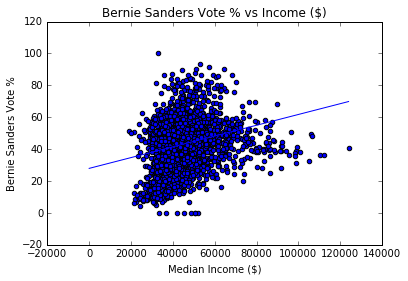

In [11]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(income, bernie)
plt.scatter(income, bernie)
plt.plot([0, max(income)],[intercept, max(income) * slope + intercept])
plt.xlabel("Median Income ($)")
plt.ylabel("Bernie Sanders Vote %")
plt.title("Bernie Sanders Vote % vs Income ($)")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))


R Value: -0.177419994127
R Squared: 0.031477854316
y = -0.000241074957486x + 64.31419796


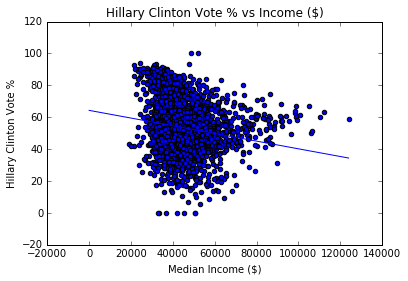

In [12]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(income, hillary)
plt.scatter(income, hillary)
plt.plot([0, max(income)],[intercept, max(income) * slope + intercept])
plt.xlabel("Median Income ($)")
plt.ylabel("Hillary Clinton Vote %")
plt.title("Hillary Clinton Vote % vs Income ($)")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))


R Value: -0.0811573552951
R Squared: 0.00658651631849
y = -0.000109469066374x + 52.131943434


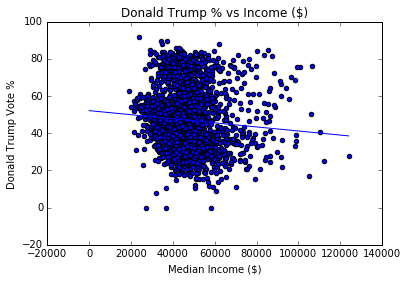

In [13]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(income, trump)
plt.scatter(income, trump)
plt.plot([0, max(income)],[intercept, max(income) * slope + intercept])
plt.xlabel("Median Income ($)")
plt.ylabel("Donald Trump Vote %")
plt.title("Donald Trump % vs Income ($)")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

R Value: -0.0691644889648
R Squared: 0.00478372653377
y = -7.58106887582e-05x + 31.327913837


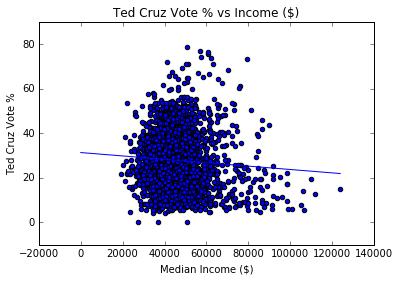

In [14]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(income, ted)
plt.scatter(income, ted)
plt.plot([0, max(income)],[intercept, max(income) * slope + intercept])
plt.xlabel("Median Income ($)")
plt.ylabel("Ted Cruz Vote %")
plt.title("Ted Cruz Vote % vs Income ($)")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

R Value: 0.309470033827
R Squared: 0.0957717018366
y = 0.000235501496499x + -1.42420349795


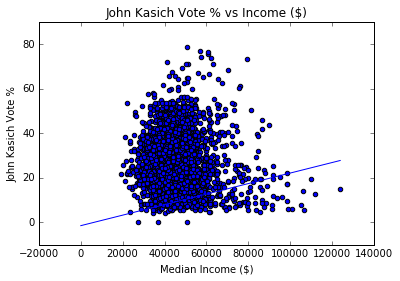

In [15]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(income, kasich)
plt.scatter(income, ted)
plt.plot([0, max(income)],[intercept, max(income) * slope + intercept])
plt.xlabel("Median Income ($)")
plt.ylabel("John Kasich Vote %")
plt.title("John Kasich Vote % vs Income ($)")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

As visible from the scatter plots, there is a fair, positive correlation between income and Bernie votes. That means that counties with a greater median income are more likely to have a greater proportion of votes for Bernie. On the Republican side, greater income also had a fair, positive correlation to more Kasich votes. Donald Trump and Ted Cruz both had weak, negative correlations with income, meaning that counties with a lower median income were slightly more likely to have a greater vote share for Trump and Cruz, but not by much.

<b>Section B: Are Counties with a Higher Unemployment Rate More Likely to Vote for a Certain Candidate?</b>

R Value: -0.291475896803
R Squared: 0.0849581984169
y = -1.24701853935x + 54.5141363537


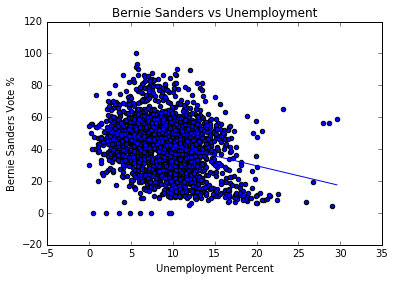

In [16]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(unemployment, bernie)
plt.scatter(unemployment, bernie)
plt.plot([0, max(unemployment)],[intercept, max(unemployment) * slope + intercept])
plt.xlabel("Unemployment Percent")
plt.ylabel("Bernie Sanders Vote %")
plt.title("Bernie Sanders vs Unemployment")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))



R Value: 0.267557056115
R Squared: 0.0715867782767
y = 1.17621644126x + 42.8117348012


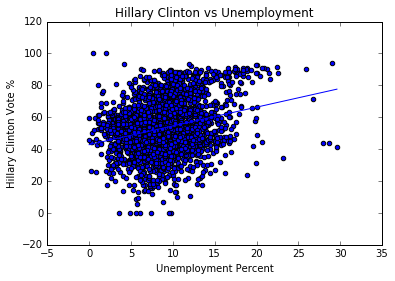

In [17]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(unemployment, hillary)
plt.scatter(unemployment, hillary)
plt.plot([0, max(unemployment)],[intercept, max(unemployment) * slope + intercept])
plt.xlabel("Unemployment Percent")
plt.ylabel("Hillary Clinton Vote %")
plt.title("Hillary Clinton vs Unemployment")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

R Value: 0.146406246344
R Squared: 0.0214347889685
y = 0.638916983683x + 41.4350734836


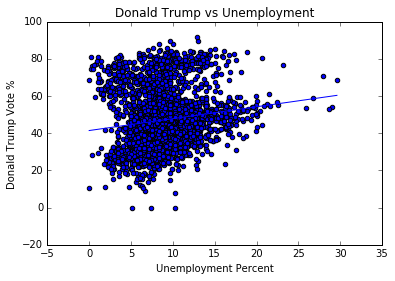

In [18]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(unemployment, trump)
plt.scatter(unemployment, trump)
plt.plot([0, max(unemployment)],[intercept, max(unemployment) * slope + intercept])
plt.xlabel("Unemployment Percent")
plt.ylabel("Donald Trump Vote %")
plt.title("Donald Trump vs Unemployment")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

R Value: -0.11078814127
R Squared: 0.0122740122461
y = -0.392881740061x + 31.3550116175


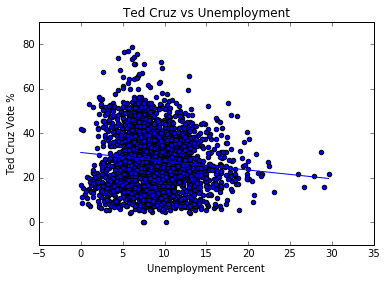

In [19]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(unemployment, ted)
plt.scatter(unemployment, ted)
plt.plot([0, max(unemployment)],[intercept, max(unemployment) * slope + intercept])
plt.xlabel("Unemployment Percent")
plt.ylabel("Ted Cruz Vote %")
plt.title("Ted Cruz vs Unemployment")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

R Value: -0.0387623048063
R Squared: 0.0015025162739
y = -0.0954346224392x + 10.2037199284


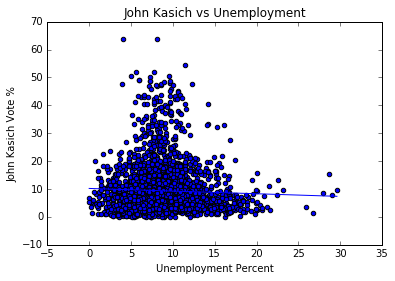

In [20]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(unemployment, kasich)
plt.scatter(unemployment, kasich)
plt.plot([0, max(unemployment)],[intercept, max(unemployment) * slope + intercept])
plt.xlabel("Unemployment Percent")
plt.ylabel("John Kasich Vote %")
plt.title("John Kasich vs Unemployment")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))


There is a fair, negative correlation between Bernie vote share and the unemployment rate of the respective county, which is surprising giving the nature of his message. On the Republican side, it is apparent that counties with a higher unemployment rate were not significantly more likely to vote for a particular candidate. However, Trump generally appealed slightly more to counties with high unemployment rate, with a weak, positive correlation, while Ted Cruz, and to a lesser degree, John Kasich, appealed slightly more to counties with a lower unemployment rate.

<b>Section C: Are Counties with a Lower Population of Ethnic Minorities More Likely to Vote for a Certain Candidate?</b>

In [21]:
#read files
filenew = open("population data.csv", "r", errors="ignore")
temp = []
#put stuff in cities
for item in filenew:
    temp.append(item)
del temp[0]
del temp[0]
#get each county, and add on the data to existing counties dictionary

for row in temp:
    nameWanted = row.split(",")[2][1:] + "," + row.split(",")[3][:-1]
    #print(row.split(",")[248])
    #print(row.split(",")[38])
    if nameWanted in counties.keys():
        diction = counties[nameWanted]
        diction["Percent White"] = float(row.split(",")[238])
        #diction["Percent Unemployed"] = float(row.split(",")[38])
        
bernie = []
hillary = []
trump = []
ted = []
kasich = []
white = []

#make income 

for countyName in counties.items():
    county = countyName[1]

    if "Bernie Sanders" in county and "Hillary Clinton" in county and "Donald Trump" in county and "Ted Cruz" in county and "John Kasich" in county and "Percent White" in county:
        white.append(county["Percent White"])
        bernie.append(county["Bernie Sanders"])
        hillary.append(county["Hillary Clinton"])
        trump.append(county["Donald Trump"])
        ted.append(county["Ted Cruz"])
        kasich.append(county["John Kasich"])


R Value: 0.574266212688
R Squared: 0.329781683035
y = 0.562889624885x + -4.83526980068


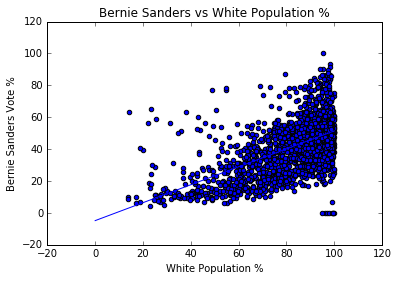

In [22]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(white, bernie)
plt.scatter(white, bernie)
plt.plot([0, max(white)],[intercept, max(white) * slope + intercept])
plt.xlabel("White Population %")
plt.ylabel("Bernie Sanders Vote %")
plt.title("Bernie Sanders vs White Population %")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))




R Value: -0.576740871073
R Squared: 0.332630032366
y = -0.580886497769x + 103.07364505


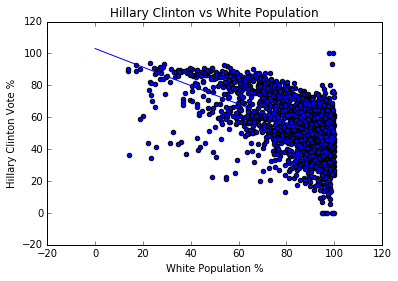

In [23]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(white, hillary)
plt.scatter(white, hillary)
plt.plot([0, max(white)],[intercept, max(white) * slope + intercept])
plt.xlabel("White Population %")
plt.ylabel("Hillary Clinton Vote %")
plt.title("Hillary Clinton vs White Population")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

R Value: -0.0133907939042
R Squared: 0.000179313361384
y = -0.0133884674918x + 48.2693732821


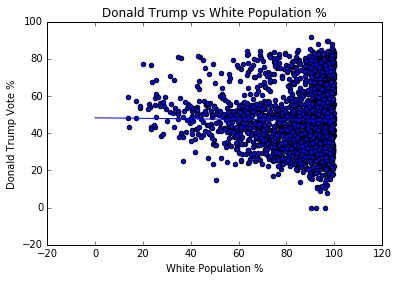

In [24]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(white, trump)
plt.scatter(white, trump)
plt.plot([0, max(white)],[intercept, max(white) * slope + intercept])
plt.xlabel("White Population %")
plt.ylabel("Donald Trump Vote %")
plt.title("Donald Trump vs White Population %")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

R Value: 0.060316947124
R Squared: 0.00363813411036
y = 0.0490058172813x + 23.6574519486


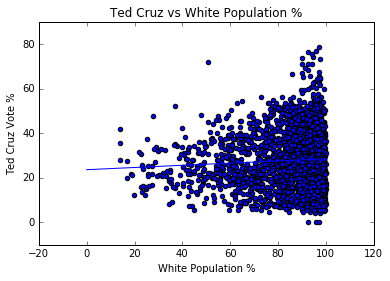

In [25]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(white, ted)
plt.scatter(white, ted)
plt.plot([0, max(white)],[intercept, max(white) * slope + intercept])
plt.xlabel("White Population %")
plt.ylabel("Ted Cruz Vote %")
plt.title("Ted Cruz vs White Population %")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

R Value: 0.136991554683
R Squared: 0.0187666860545
y = 0.0772733744128x + 2.73050689009


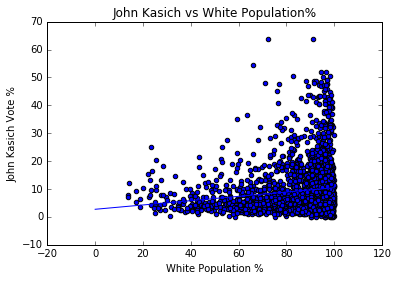

In [26]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(white, kasich)
plt.scatter(white, kasich)
plt.plot([0, max(white)],[intercept, max(white) * slope + intercept])
plt.xlabel("White Population %")
plt.ylabel("John Kasich Vote %")
plt.title("John Kasich vs White Population%")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

<b>Among Democrats</b>, counties with a higher proportion of white people were much more likely to vote for Bernie Sanders, with a fairly strong, positive correlation of 0.57. Counties with a greater proportion of minorities tended to vote more for Hillary.

<b>Among Republicans</b>, counties with a higher proportion of white people were very slightly more likely to vote for John Kasich or Ted Cruz, with correlations of 0.13 (John Kasich) and 0.06 (Ted Cruz). Donald Trump's correlation (-.01) is too low to make much of a conclusion. It seems that counties with more minorities were no more likely to have more Republican support for Trump than counties that are almost entirely white. Remember that this is primary data, not general election data, so the Republican and Democrat voting groups are self-selected and may not be representative of the county as a whole. It is possible that even though the county has a lot of minorities, the party could have a voting population that is still almost entirely white (or the other way around).

<b>Section D: Do Counties with a greater population density vote more for certain candidates?</b>

In [27]:
#read files
#print(counties)
filenew = open("pop density.csv", "r", errors="ignore")
temp = []
#put stuff in cities
for item in filenew:
    temp.append(item)
#get each county, and add on the data to existing counties dictionary

for row in temp:
    locationPieces = row.split(",")[0].split(" - ")
    #ignore non counties
    if len(locationPieces) > 2:
        actualName = locationPieces[2] + ", " + locationPieces[1]
        if actualName in counties.keys():
            
            dictiony = counties[actualName]
            dictiony["Density"] = float(row.split(",")[1])
density = []
bernie = []
hillary = []
trump = []
ted = []
kasich = []
for countyName in counties.items():
    county = countyName[1]
    if "Bernie Sanders" in county and "Hillary Clinton" in county and "Donald Trump" in county and "Ted Cruz" in county and "John Kasich" in county and "Density" in county:
        density.append(county["Density"])
        bernie.append(county["Bernie Sanders"])
        hillary.append(county["Hillary Clinton"])
        trump.append(county["Donald Trump"])
        ted.append(county["Ted Cruz"])
        kasich.append(county["John Kasich"])   

R Value: -0.031121717248
R Squared: 0.000968561284467
y = -0.000493812842811x + 43.5137601451


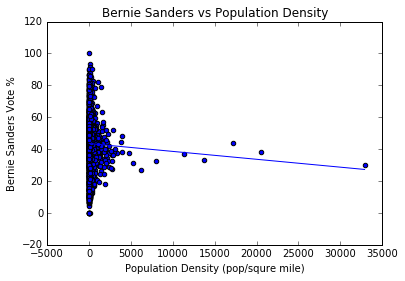

In [28]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(density, bernie)
plt.scatter(density, bernie)
plt.plot([0, max(density)],[intercept, max(density) * slope + intercept])
plt.xlabel("Population Density (pop/squre mile)")
plt.ylabel("Bernie Sanders Vote %")
plt.title("Bernie Sanders vs Population Density")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

R Value: 0.0550211311684
R Squared: 0.00302732487505
y = 0.000897075336329x + 53.1013727337


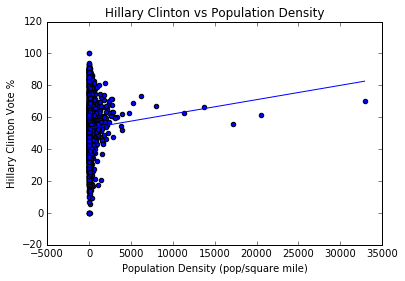

In [29]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(density, hillary)
plt.scatter(density, hillary)
plt.plot([0, max(density)],[intercept, max(density) * slope + intercept])
plt.xlabel("Population Density (pop/square mile)")
plt.ylabel("Hillary Clinton Vote %")
plt.title("Hillary Clinton vs Population Density")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

R Value: 0.0387390436801
R Squared: 0.00150071350525
y = 0.000626992415082x + 46.9964604065


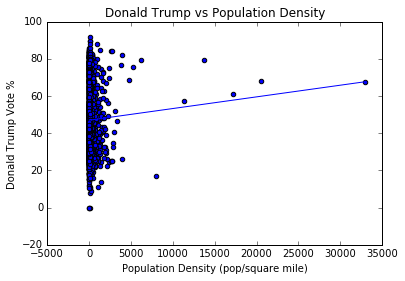

In [30]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(density, trump)
plt.scatter(density, trump)
plt.plot([0, max(density)],[intercept, max(density) * slope + intercept])
plt.xlabel("Population Density (pop/square mile)")
plt.ylabel("Donald Trump Vote %")
plt.title("Donald Trump vs Population Density")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

R Value: -0.102934989762
R Squared: 0.0105956121173
y = -0.00135381761058x + 28.12866214


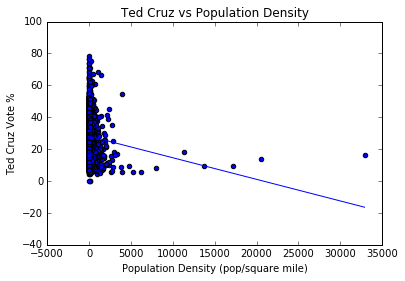

In [31]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(density, ted)
plt.scatter(density, ted)
plt.plot([0, max(density)],[intercept, max(density) * slope + intercept])
plt.xlabel("Population Density (pop/square mile)")
plt.ylabel("Ted Cruz Vote %")
plt.title("Ted Cruz vs Population Density")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

R Value: 0.147540453252
R Squared: 0.0217681853458
y = 0.00134721231991x + 9.08515046631


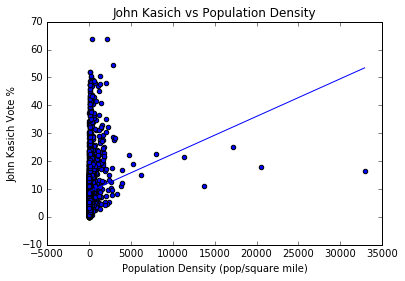

In [32]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(density, kasich)
plt.scatter(density, kasich)
plt.plot([0, max(density)],[intercept, max(density) * slope + intercept])
plt.xlabel("Population Density (pop/square mile)")
plt.ylabel("John Kasich Vote %")
plt.title("John Kasich vs Population Density")

print("R Value:", rvalue)
print("R Squared:", rvalue * rvalue)
print("y = " + str(slope) + "x + " + str(intercept))

The results from this section are interesting. The regression lines need to be used with caution. For starters, there aren't many counties with a population density greater than 5000, though it should be noted that some counties may have been excluded due to lack of data. This means there is a limited number of data points past a density of 5,000 people, making it difficult to make a solid prediction of which candidates the county is more likely to go for. Often times, the endpoint behavior of the trendline did not match the endpoint behavior of the actual data. If we ignore these considerations, we can conclude that Hillary, Trump, and Kasich appeal more to more dense, and therefore, urban voters, while Bernie and Ted Cruz appeal more to less dense/rural areas. Again, many of these correlations are weak, and have magnitudes less than .035. Another important consideration is that population density in counties is not the most accurate way to measure cities vs urban voters. Some cities, such as New York, are divided into several counties/boroughs, whose landmass is almost entirely urban. Others, such as Seattle, are located in large counties, where there is a high population density in the urban areas, but low throughout the entire county due to its large landmass.

<b>Does the typical (median) county have a higher or lower income, unemployment rate, percent white and population density than the average? Do these correspond to the winners of the primaries (Hillary Clinton and Donald Trump)?</b>

In [40]:
print("Median Income", statistics.median(income))
print("Mean Income", statistics.mean(income))
print()
print("Median Unemployment Rate",statistics.median(unemployment))
print("Mean Unemployment Rate",statistics.mean(unemployment))
print()
print("Median Percent White",statistics.median(white))
print("Mean Percent White",statistics.mean(white))
print()
print("Median Population Density",statistics.median(density))
print("Mean Population Density",statistics.mean(density))

Median Income 44076.5
Mean Income 45768.336377473366

Median Unemployment Rate 8.7
Mean Unemployment Rate 8.900456621004567

Median Percent White 92.1
Mean Percent White 85.71906392694063

Median Population Density 49.25
Mean Population Density 199.7886605783866


The median household income was less than the average income, which averages that there a "typical" county will have an income of around 44,076.50, but there are several counties that have significantly higher incomes resulting in a skewed curve. Thus, thus there are more counties with a household income lower than the average than higher than the average. Therefore, the candidate that appeals to lower income voters better is more likely to win the primaries. Hillary Clinton and Donald Trump both appeal to lower income counties better. 

The median unemployment rate was less than the average. Thus, there were more counties with an unemployment rate lower than the average than higher. Therefore, the candidate that appeals to counties with less unemployed is more likely to win the primaries, but Donald Trump and Hillary Clinton both do better in counties with a higher unemployment rate.

The median percent white was higher than the average. Thus, there were more counties with more white people than the average. Thus, the candidates that appeal to counties with a greater proportion of white people are more likely to iwn the primaries. This does not match the actual primary results - Hillary Clinton appeals better to counties with more minorities, and for Donald Trump, it doesn't make much of a different.

The median population density was lower than the average. Therefore, there were more counties with a population density lower than the average than higher. Therefor, the candidates that appeal better to rural counties are more likely to win the better. However, Donald Trump and Hillary Clinton both attracted counties with a greater population density.

These results could indicate that household income is a good indicator of which candidate will win the primaries, while percent white, unemployment rate, and population density are not. It could also show that other factors need to be considered as well, and that the demographics don't tell the full story.

<h1>Summary of Results</h1>
<h3>Democrats</h3>

Counties with a higher proportion of Bernie Sanders Votes were more likely to have:

- More Republicans voting for John Kasich, and less for Ted Cruz

- A higher median income, a lower unemployment rate, a higher proportion of white people, and a lower population density*


<br>
Counties with a higher proportion of Hillary Clinton Votes were more likely to have:

- More Republicans voting for Ted Cruz, and less for John Kasich

- A lower median income, a higher unemployment rate, a lower proportion of white people, and higher population density*

<br>
The share of Democrats voting for Hillary or Bernie in a county had little correlation with Republican Trump support.

\* use caution, correlation is weak


<br>
<h3>Republicans</h3>

Counties with a higher proportion of Donald Trump Votes were more likely to have:

- A <b>slightly</b> lower median income, a higher unemployment rate and a higher population density

The counties supporting Donald Trump were not more likely to have

- A greater proportion of Democrats voting for either Hillary Clinton or Donald Trump

- A greater percentage of white people

<br>

Counties with a higher proportion of Ted Cruz Votes were more likely to have:

- A greater proportion of Democrats voting for Hillary Clinton

- A <b>slightly</b> lower (less so than Trump) median income, a lower unemployment rate, a tiny bit greater share of white people, and a lower population density*.


<br>

Counties with a higher proportion of John Kasich Votes were more likely to have:

- A greater proportion of Democrats voting for Bernie Sanders

- A higher median income, very very slighty higher unemployment\*, a greater proportion of white people, and a higher population density

\* use caution, correlation is weak


<br>
<h3>Overall</h3>

- The results from part 1 did not actually match up entirely with results of part 2
- Greater Bernie votes correspond to greater John Kasich votes. Both candidates were correlated to a higher median income and greater proportion of white people. However counties with greater support for John Kasich were also correlated with a slightly higher unemployment and a higher population density. This could mean that those demographics are less impactful than it may appear. It could also be due to the fact that the correlation between population density was questionable for Bernie, and the correlation between unemplyment and Kasich votes was weak.
- Greater Hillary votes correspond to greater Ted Cruz votes, yet the correlations of demographics showed that their support was only consistent in that both candidates attracted counties with lower median incomes. Again, this could be due to a number of factors. It is possible that there are other demographics that are correlated for both.

- It is important to remember that these demographic correlations are based off of either Democrats or Republicans, but not both. These correlations cannot easily be extrapolated to the general election. For example, we found that the proportion of white people in a county has little bearing on Trump's vote share. However, this is only of Republican voters - its possible that there aren't very many non-white Republicans who voted in the primaries either, so the issue of race is contained within the Republican party. Therefore, race does not play much of a role in Republicans deciding who to vote for. However, in the general election, the elcectorate is entirely different; race might have a much bigger impact among the general population than the Republican party. Therefore these results are not very definitive for the population at large - its possible that the demographics of the party in a particular county do not even match the county as a whole.

- Not all counties may have been included. Some counties were missing primary data. Also, since the analysis used several different sheets, some counties may have been dropped if they were named slightly differently in different sheets. Therefore, the results may not be representative of 100% of the US.

<h3>Discussion/Reactions</h3>
The results of this analyisis has been interesting and insightful. The fact that lower income counties were more likely to vote for Hillary instad of Bernie on the Democrat side seems suprising given Bernie's advocacy for the working class. I was also suprised that race had little bearing on Trump's vote share. However, it is possible that even in counties that had a very lower proportion of white people, the Republicans who voted in the primary were predominantely white, and it will be interesting to compare these correlations with data from the general election. Finally, I was suprised that Bernie and Trump did not share very many correlations, despite the common idea that they attract similar voters. However, again, this could be due to the fact that the demographics of the party in a county do not match those of the county itself. It would be interesting to compare if the correlations for Trump and Hillary hold true using general election data.  